In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output
from WatChMaL.analysis.plot_utils import plot_confusion_matrix, plot_classifier_response, compute_roc, plot_roc

In [4]:
############# define plotting params #############

c = plt.rcParams['axes.prop_cycle'].by_key()['color']
l = ['solid','dashdot','dashed','dotted',':','-.']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2, "$\pi^0$":3}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$", 3:"$\pi^0$"}

In [5]:
############# define run locations #############

short_locs = [
              '/home/hlahiouel/WatChMaL/outputs/2021-02-11/08-36-41/outputs',
              '/home/hlahiouel/WatChMaL/outputs/2021-02-04/12-47-05/outputs',
              '/home/hlahiouel/WatChMaL/outputs/2021-02-05/07-22-59/outputs',
              '/home/hlahiouel/WatChMaL/outputs/2021-02-07/20-01-02/outputs',
              '/home/hlahiouel/WatChMaL/outputs/2021-02-07/20-04-38/outputs',
              '/home/hlahiouel/WatChMaL/outputs/2021-02-10/14-54-54/outputs',
              '/home/hlahiouel/WatChMaL/outputs/2021-02-10/15-07-17/outputs',
              '/home/hlahiouel/WatChMaL/outputs/2021-02-10/15-20-39/outputs',
              '/home/hlahiouel/WatChMaL/outputs/2021-02-10/15-33-06/outputs',
             ]

short_titles = [
                'Short Tank - 3 Class - OD Veto',
                'Short Tank - 4 Class - No Veto',
                'Short Tank - 4 Class - No Veto',
                'Short Tank - 4 Class - No Veto',
                'Short Tank - 4 Class - No Veto',
                'Short Tank - 4 Class - OD Veto',
                'Short Tank - 4 Class - OD Veto',
                'Short Tank - 4 Class - OD Veto',
                'Short Tank - 4 Class - OD Veto',
               ]

print(len(short_titles))

short_linecolor = [c[3],c[4],c[4],c[4],c[4],c[5],c[5],c[5],c[5]]

print(len(short_linecolor))

short_linestyle = [l[3],l[4],l[4],l[4],l[4],l[5],l[5],l[5],l[5]]

print(len(short_linestyle))

9
9
9


In [6]:
short_raw_output_softmax = [np.load(loc + "/softmax.npy") for loc in short_locs]

In [ ]:
#print(short_raw_output_softmax)

In [7]:
def renormalize(softmax):
    """
    This function will renormalize the e/gamma probabilities
    
    Arg(s):
        softmax ... List of softmax data from multiple runs 
        
    Returns:
        new_softmax ... List of softmax data that has been renormalized
    """
    norm_sum = softmax[:,0] + softmax[:,1]
        
    normalized_softmax = softmax[:,0:2] / norm_sum[:,None]
    
    return normalized_softmax

In [8]:
new_softmax = [renormalize(softmax) for softmax in short_raw_output_softmax]

In [ ]:
#print(new_softmax)

In [ ]:
#norm_sum = short_raw_output_softmax[:,0] + short_raw_output_softmax[:,1]

#new_softmax = short_raw_output_softmax[:,0:2] / norm_sum[:,None]

In [9]:
short_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in short_locs]
short_raw_predictions    = [np.load(loc + "/predictions.npy") for loc in short_locs]

In [10]:
short_fprs, short_tprs, short_thrs = multi_compute_roc(new_softmax, short_raw_actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

In [11]:
fprs =  short_fprs 
tprs = short_tprs 
thrs = short_thrs

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../WatChMaL/analysis/plot_utils.py:451: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


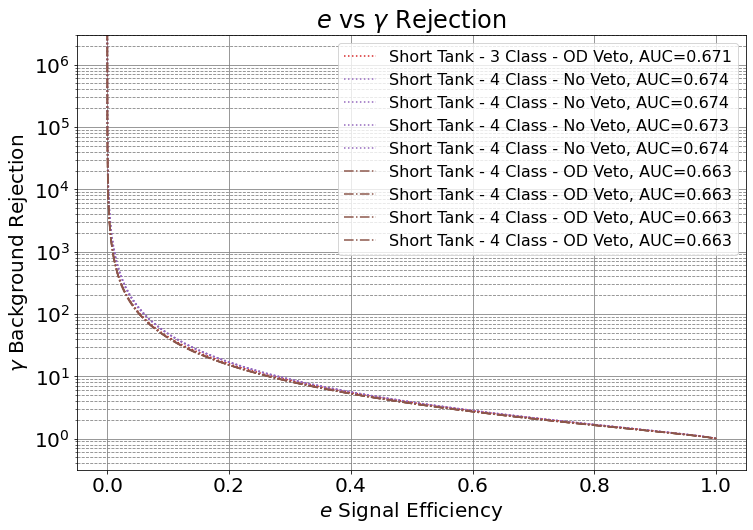

In [12]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=short_linestyle, linecolors=short_linecolor, 
                      plot_labels=short_titles, show=False)